# Descriptive Statistics on Beauty Features
---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json 
with open('../sleeping_coeff/bcoefficients13358.json') as json_file: 
    data = json.load(json_file)

In [3]:
import pandas as pd
df = pd.DataFrame(data.values(), 
                  columns=['case_id', 'bcoefficient', 'publication_year', 'total_citations', 'max_citations_in_a_year', 'max_citation_year', 'awakening_time_year', 'sleep_time_years', 'time_from_awakening_to_peak_years'])
# time_from_awakening_to_peak_years = Number of years after publication to get to the year with maximum number of citations
df.bcoefficient = df.bcoefficient.astype(float)
for c in df.columns[2:]:
    df[c] = df[c].astype(int)

In [4]:
df

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years
0,61997CJ0147,0.0,2000,1,1,2000,2000,0,0
1,61995CJ0032,10.0,1996,8,2,2000,1997,1,3
2,61995CJ0067,55.0,1997,2,1,2008,2007,10,1
3,61994CJ0308,0.0,1996,0,0,1996,1996,0,0
4,61998CJ0285,211.0,2000,11,6,2009,2007,7,2
...,...,...,...,...,...,...,...,...,...
13353,62010CO0526,0.0,2010,0,0,2010,2010,0,0
13354,62016CO0406,0.0,2016,0,0,2016,2016,0,0
13355,62004CO0521,0.0,2005,0,0,2005,2005,0,0
13356,62015CO0035,5.0,2015,3,2,2018,2017,2,1


In [5]:
df.columns

Index(['case_id', 'bcoefficient', 'publication_year', 'total_citations',
       'max_citations_in_a_year', 'max_citation_year', 'awakening_time_year',
       'sleep_time_years', 'time_from_awakening_to_peak_years'],
      dtype='object')

### Variables Dependency
- bcoefficient <- all
- sleep_time_years <- awakening_time_year - publication_year
- publication_year <- independent
- total_citations <- independent
- time_from_awakening_to_peak_years <- max_citation_year - awakening_time_year
- max_citation_year <- independent
- max_citations_in_a_year <- independent
- peak_year_relative_importance <- max_citations_in_a_year / total_citations (the closest to one the more important that year was)
- sleep_to_peak_ratio <- time_from_awakening_to_peak_years / sleep_time_years (ratio, if greater that one then it take more time for peak year than to be awakened, the closer to 0 the fastest)
- ? Increase ratio
- ? Decrease ratio
- ? Peak decade

In [6]:
df['peak_year_relative_importance'] = [x/y if y > 0 else 0 for x, y in zip(df['max_citations_in_a_year'], df['total_citations'])]
df['sleep_to_peak_ratio'] = [x/y if y > 0 else 0 for x, y in zip(df['time_from_awakening_to_peak_years'], df['sleep_time_years'])]

### Including Metadata

In [7]:
metadata = pd.read_csv('../datasets/all_cases_metadata.csv')

In [8]:
df = df\
    .merge(metadata, how='left', left_on='case_id', right_on='source')\
    .drop(columns=['ruling_type','ruling_content']) #'source_x','source_y'
df.case_time = [int(i.replace(i[-24:],''))  for i in df.case_time]
df.case_time = df.case_time/365

In [9]:
df.head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,document_date,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name
0,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.000000,...,2000-02-10,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...
1,61995CJ0032,10.0,1996,8,2,2000,1997,1,3,0.250000,...,1996-10-24,1996,10,1995.0,2.0,1.704110,1,0,Judgment of the Court (Sixth Chamber) of 24 Oc...,Commission of the European Communities v Lisr...
2,61995CJ0067,55.0,1997,2,1,2008,2007,10,1,0.500000,...,1997-10-09,1997,10,1995.0,3.0,2.578082,1,0,Judgment of the Court (Second Chamber) of 9 Oc...,Rank Xerox Manufacturing (Nederland) BV v Ins...
3,61994CJ0308,0.0,1996,0,0,1996,1996,0,0,0.000000,...,1996-02-01,1996,2,1994.0,11.0,1.194521,1,0,Judgment of the Court (Sixth Chamber) of 1 Feb...,Office National de l'Emploi v Heidemarie Naru...
4,61998CJ0285,211.0,2000,11,6,2009,2007,7,2,0.545455,...,2000-01-11,2000,1,1998.0,7.0,1.468493,1,0,Judgment of the Court of 11 January 2000.,Tanja Kreil v Bundesrepublik Deutschland.


### Generate quick report

In [10]:
# import sweetviz as sv
# quick_report = sv.analyze(df)
# quick_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

---
# The total of citations

The beauty coefficient and the calculation of sleep time are dependent on citations, therefore we only account cases with at least one citation

In [11]:
#Accounting only cited cases
df = df[df.total_citations != 0]
df.describe()

,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio,main_subject,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases
count,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8978.000000,8978.000000,8979.000000,8979.000000,8979.000000
mean,46.051153,2000.421428,4.765898,1.745851,2004.913799,2003.973382,3.551955,0.940417,0.545945,0.295972,1.524891,2000.421428,6.661989,1998.874248,6.464135,1.561251,1.057356,0.085310
std,174.232056,12.712683,5.859097,1.350397,10.643870,10.672741,6.220860,0.583153,0.315054,0.480958,0.828270,12.712683,3.480864,12.621997,3.473302,0.749829,0.478248,0.279358
min,0.000000,1954.000000,1.000000,0.000000,1955.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,1.000000,1954.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,1992.000000,1.000000,1.000000,1998.000000,1997.000000,0.000000,1.000000,0.300000,0.000000,1.000000,1992.000000,4.000000,1990.000000,3.000000,1.082192,1.000000,0.000000
50%,1.000000,2003.000000,3.000000,1.000000,2008.000000,2007.000000,1.000000,1.000000,0.500000,0.090909,1.000000,2003.000000,6.000000,2001.000000,6.000000,1.498630,1.000000,0.000000
75%,16.833333,2011.000000,6.000000,2.000000,2014.000000,2013.000000,4.000000,1.000000,1.000000,0.500000,2.000000,2011.000000,10.000000,2010.000000,10.000000,1.942466,1.000000,0.000000
max,4709.500000,2018.000000,118.000000,17.000000,2019.000000,2018.000000,55.000000,8.000000,1.000000,8.000000,7.000000,2018.000000,12.000000,2017.000000,12.000000,10.832877,17.000000,1.000000


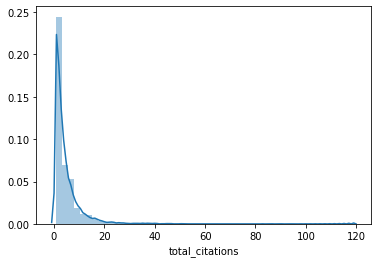

In [12]:
# Citations distribution
sns.distplot(df.total_citations)

Left skewed distribution

### 1. How many citations are needed to be in the top 10%?

In [13]:
len(df.case_id.unique())

8979

In [14]:
# What is the "number of citations"-value on which the top 10% citations will be above
value = df.total_citations.quantile(0.90)
value

10.0

In [15]:
df['top_cited'] = df.total_citations.apply(lambda x: (1 if x > value else 0))
df.top_cited.sum()

870

### 2. How many citations in average a case has from the top 10%?

In [16]:
df[df.top_cited == 1].total_citations.mean()

18.27816091954023

In [17]:
df[df.top_cited == 1].total_citations.std()

9.898256001579751

---
# The sleep time

In [18]:
# Sleep time distribution
df.sleep_time_years.describe()

count    8979.000000
mean        3.551955
std         6.220860
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        55.000000
Name: sleep_time_years, dtype: float64

In [19]:
df[df.top_cited == 0].sleep_time_years.describe()

count    8109.000000
mean        3.469478
std         6.212561
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        54.000000
Name: sleep_time_years, dtype: float64

### 3. What is the average sleeping time?

A case sleeps 3.5 (6.22) years before is awakened in the whole set

In [20]:
df[df.top_cited == 1].sleep_time_years.describe()

count    870.000000
mean       4.320690
std        6.249099
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       55.000000
Name: sleep_time_years, dtype: float64

A case in the top 10% sleeps 4.3 (6.22) years before is awakened

### 4. Is there any relation between the sleeping time and the lenght of the case?

Negative correlation (-0.1262831055702362, 3.046040026936039e-33)


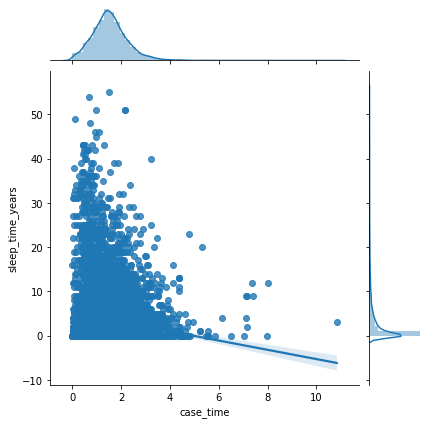

In [21]:
sub = df[['case_time','sleep_time_years','time_from_awakening_to_peak_years']]
#sns.pairplot(sub, corner=True, kind="reg")
from scipy import stats
print('Negative correlation',stats.pearsonr(sub.case_time, sub.sleep_time_years))
sns.jointplot("case_time", "sleep_time_years", data=sub, kind="reg")

*No there is not*

In [22]:
df.sort_values('case_time', ascending=False).head(2)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited
8173,61989CJ0104(01),6.000000,2000,3,1,2004,2003,3,1,0.333333,...,2000,1,1989.0,3.0,10.832877,2,1,Judgment of the Court (Sixth Chamber) of 27 Ja...,J.M. Mulder; W.H. Brinkhoff; J.M.M. Muskens; ...,0
10680,61977CJ0087,246.666667,1985,12,5,1998,1997,12,1,0.416667,...,1985,7,1977.0,7.0,8.016438,1,1,Judgment of the Court (Second Chamber) of 11 J...,Vittorio Salerno and others v Commission of t...,1


**The longest registered case took 10 years** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594636644772&uri=CELEX:61989CJ0104(01)  

    Judgment of the Court (Sixth Chamber) of 27 January 2000. 
    J.M. Mulder, W.H. Brinkhoff, J.M.M. Muskens, T. Twijnstra and Otto Heinemann v Council of the European Union and Commission of the European Communities. 
    Additional levy on milk - Non-contractual liability - Reparation and assessment of damage. 
    Joined cases C-104/89 and C-37/90.

We can draw a line of the longest cases and most sleeping time

### 4. Is there a difference on the sleeping time between top cited cases and non-top cited cases?

In [23]:
from statsmodels.stats.power import tt_ind_solve_power

mean_diff = df[df.top_cited == 0].sleep_time_years.mean() - df[df.top_cited ==1 ].sleep_time_years.mean()
sd_diff = df[df.top_cited == 0].sleep_time_years.std() - df[df.top_cited ==1 ].sleep_time_years.std()
std_effect_size = mean_diff / sd_diff
print(std_effect_size)
n = tt_ind_solve_power(effect_size=std_effect_size, alpha=0.01, power=0.9, ratio=.1, alternative='larger') #ratio is .1 because top cited is 10%
print('Number in *each* group: {:.5f}'.format(n))

23.296666015096648
Number in *each* group: 3.42567


In [24]:
#number_top_cited = len(df[df.top_cited == 1])
df_non_top_sample = df[df.top_cited == 0].sample(n=int(n), random_state=12733)
df_top_cited = df[df.top_cited ==1 ].sample(n=int(n), random_state=86473)

In [25]:
print('Average Sleeping time in years \n Non-Top cited cases: {} (SD {}) \n Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.sleep_time_years.mean(),2), round(df_non_top_sample.sleep_time_years.std(),2), 
    round(df_top_cited.sleep_time_years.mean(),2), round(df_top_cited.sleep_time_years.std(),2))) 

Average Sleeping time in years 
 Non-Top cited cases: 2.0 (SD 2.0) 
 Top cited cases: 8.33 (SD 13.58)


In [26]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.sleep_time_years, df_top_cited.sleep_time_years, equal_var = False)

Ttest_indResult(statistic=-0.7993360076321754, pvalue=0.5049093269163308)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal*   
**Yes (there is an statistical difference but marginal, it is nevertheless unlikely that the sleeping time is a predictor of importance)**

### 5. Which are the cases with the longer sleep time?

In [27]:
df.sort_values(by='sleep_time_years', ascending =False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited
7489,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,1958,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,1
4831,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,...,1960,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,0
4852,61958CJ0019,1326.0,1960,1,1,2012,2011,51,1,1.000000,...,1960,5,1958.0,3.0,2.150685,1,0,Judgment of the Court of 10 May 1960.,Federal Republic of Germany v High Authority ...,0
4851,61958CJ0003,1326.0,1960,1,1,2012,2011,51,1,1.000000,...,1960,5,1958.0,3.0,2.156164,1,1,Judgment of the Court of 10 May 1960.,Barbara Erzbergbau AG and others v High Autho...,0
4840,61963CJ0069,1326.0,1964,1,1,2016,2015,51,1,1.000000,...,1964,6,1963.0,6.0,0.967123,1,0,Judgment of the Court (First Chamber) of 9 Jun...,Mrs Anne-Marie Marcillat (née Capitaine) v Co...,0
12006,61965CO0025,1225.0,1967,1,1,2017,2016,49,1,1.000000,...,1967,5,1967.0,4.0,0.115068,1,0,Order of the Court (Second Chamber) of 26 May ...,Società Industriale Metallurgica di Napoli (S...,0
2362,61965CJ0051,1176.0,1966,1,1,2015,2014,48,1,1.000000,...,1966,4,1965.0,7.0,0.750685,1,0,Judgment of the Court of 28 April 1966.,ILFO - Industria Laminati Ferrosi Odolese SRL...,0
4847,61960CJ0025,1081.0,1962,1,1,2009,2008,46,1,1.000000,...,1962,3,1961.0,3.0,0.926027,1,0,Judgment of the Court (First Chamber) of 1 Mar...,Mrs Leda De Bruyn v European Parliament.,0
2351,61967CJ0005,1081.0,1968,1,1,2015,2014,46,1,1.000000,...,1968,3,1967.0,2.0,1.093151,1,0,Judgment of the Court of 13 March 1968.,W. Beus GmbH &amp; Co. v Hauptzollamt München.,0
4778,61962CJ0036,1035.0,1963,1,1,2009,2008,45,1,1.000000,...,1963,12,1962.0,12.0,0.967123,1,0,Judgment of the Court of 16 December 1963.,Société des Aciéries du Temple v High Authori...,0


*The case with max sleep time is 55 years making a total of 12 citations after all*  
**Top lazy case:** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594566429905&uri=CELEX:61956CJ0009

    Judgment of the Court of 13 June 1958. 
    Meroni & Co., Industrie Metallurgiche, SpA v High Authority of the European Coal and Steel Community. 
    Case 9-56.

---
# The awakened years

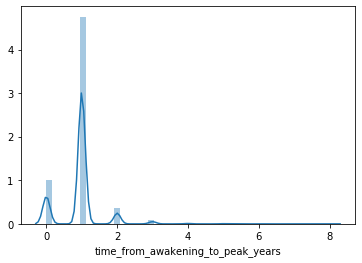

In [28]:
sns.distplot(df.time_from_awakening_to_peak_years, kde_kws={'bw':0.1})

### 7. What is the expected time in years to get to the most cited years after being awakened?

In [29]:
df.time_from_awakening_to_peak_years.describe()

count    8979.000000
mean        0.940417
std         0.583153
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: time_from_awakening_to_peak_years, dtype: float64

*Once a case is awakened within the first year will reach the point of highest number of citations per year.*

### 8. Is there a difference on the "speed to peak" in years between top cited cases and non-top cited cases?

In [30]:
print('Average Speed to peak in years \n Non-Top cited cases: {} (SD {}) \n Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.time_from_awakening_to_peak_years.mean(),2), round(df_non_top_sample.time_from_awakening_to_peak_years.std(),2), 
    round(df_top_cited.time_from_awakening_to_peak_years.mean(),2), round(df_top_cited.time_from_awakening_to_peak_years.std(),2))) 

Average Speed to peak in years 
 Non-Top cited cases: 1.0 (SD 0.0) 
 Top cited cases: 1.67 (SD 1.15)


In [31]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.time_from_awakening_to_peak_years, df_top_cited.time_from_awakening_to_peak_years, equal_var = False)

Ttest_indResult(statistic=-1.0, pvalue=0.42264973081037427)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal (the means are statistically different)*   
**Yes (an intuitive result - a case needs more time to accumulate high number of citations, potentially the rate of change is a predictor for importance)**

In [32]:
df.peak_year_relative_importance.describe()

count    8979.000000
mean        0.545945
std         0.315054
min         0.000000
25%         0.300000
50%         0.500000
75%         1.000000
max         1.000000
Name: peak_year_relative_importance, dtype: float64

### 9. What are the cases that received all their citations right after they were awakened?

In [33]:
len(df[df.peak_year_relative_importance==1].sort_values('total_citations',ascending=False))

2463

In [34]:
df[df.peak_year_relative_importance==1].sort_values('total_citations',ascending=False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited
6942,62007CJ0161,30.0,2008,10,10,2011,2010,2,1,1.0,...,2008,12,2007.0,3.0,1.753425,1,0,Judgment of the Court (First Chamber) of 22 De...,Commission of the European Communities v Repub...,0
2795,62013CJ0608,0.0,2016,8,8,2017,2016,0,1,1.0,...,2016,6,2013.0,11.0,2.539726,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Compañía Española de Petróleos (CEPSA); SA v E...,0
2794,62013CJ0616,0.0,2016,8,8,2017,2016,0,1,1.0,...,2016,6,2013.0,11.0,2.534247,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Productos Asfálticos (PROAS); SA v European Co...,0
3815,62013CJ0531,0.0,2015,6,6,2016,2015,0,1,1.0,...,2015,2,2013.0,10.0,1.345205,1,0,Judgment of the Court (Second Chamber) of 11 F...,Marktgemeinde Straßwalchen and Others v Bundes...,0
4355,61995CJ0247,18.0,1997,6,6,2000,1999,2,1,1.0,...,1997,2,1995.0,7.0,1.561644,1,0,Judgment of the Court (Sixth Chamber) of 6 Feb...,Finanzamt Augsburg-Stadt v Marktgemeinde Weld...,0
1794,61983CJ0049,546.0,1984,6,6,1998,1997,13,1,1.0,...,1984,7,1983.0,3.0,1.293151,1,0,Judgment of the Court of 12 July 1984.,Grand Duchy of Luxembourg v Commission of the...,0
1372,61985CJ0348,275.0,1987,5,5,1998,1997,10,1,1.0,...,1987,12,1985.0,11.0,2.079452,1,0,Judgment of the Court of 15 December 1987.,Kingdom of Denmark v Commission of the Europe...,0
9201,61999CJ0266,0.0,2001,5,5,2001,2001,0,0,1.0,...,2001,3,1999.0,7.0,1.646575,1,0,Judgment of the Court (Sixth Chamber) of 8 Mar...,Commission of the European Communities v Fren...,0
11583,62016CO0240,0.0,2017,4,4,2017,2017,0,0,1.0,...,2017,2,2016.0,4.0,0.769863,1,0,Order of the Court (Tenth Chamber) of 1 Februa...,Vedran Vidmar and Others v European Commission.,0
508,62004CJ0408,112.0,2008,4,4,2016,2015,7,1,1.0,...,2008,4,2004.0,9.0,3.600000,1,0,Judgment of the Court (Grand Chamber) of 22 Ap...,Commission of the European Communities v Salzg...,0


Top case where all its citations came from the same year that was awakened: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594568525510&uri=CELEX:62007CJ0161

    Judgment of the Court (First Chamber) of 22 December 2008.
    Commission of the European Communities v Republic of Austria.
    Failure of a Member State to fulfil obligations - Article 43 EC - National legislation laying down the conditions for registration of partnerships or companies on application by nationals of the new Member States - Procedure for certification of self-employed status.
    Case C-161/07.

**SLEEP-AWAKE-SLEEP record** Top case where all its citations came from the same year that was awakened with 13 YEARS of sleep: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1596722494556&uri=CELEX:61983CJ0049

    Judgment of the Court of 12 July 1984. 
    Grand Duchy of Luxembourg v Commission of the European Communities. 
    Clearance of EAGGF accounts. 
    Case 49/83.

Negative correlation (0.028289112912232326, 0.007345269649297869)


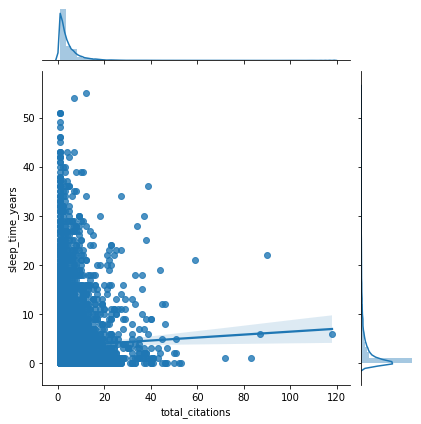

In [35]:
sub = df[df.peak_year_relative_importance==1]
sub = df[['case_time','sleep_time_years','total_citations']]
#sns.pairplot(sub, corner=True, kind="reg")
print('Negative correlation',stats.pearsonr(sub.total_citations, sub.sleep_time_years))
sns.jointplot("total_citations", "sleep_time_years", data=sub, kind="reg")

### 10. What are the cases that took more time to get on the peak years than time spending on sleeping?

count    8979.000000
mean        0.295972
std         0.480958
min         0.000000
25%         0.000000
50%         0.090909
75%         0.500000
max         8.000000
Name: sleep_to_peak_ratio, dtype: float64


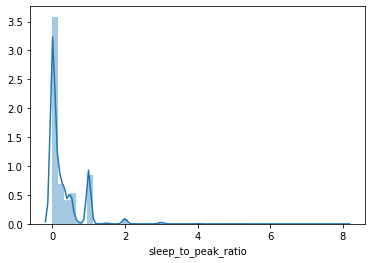

In [36]:
print(df.sleep_to_peak_ratio.describe())
sns.distplot(df.sleep_to_peak_ratio)

In [37]:
df[(df.sleep_to_peak_ratio > 1) & (df.sleep_time_years > 1)]\
    .sort_values('max_citations_in_a_year', ascending = False).head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited
10463,61991CJ0267,132.400000,1993,44,6,2003,1995,2,8,0.136364,...,1993,11,1991.0,10.0,2.109589,1,1,Judgment of the Court of 24 November 1993.,Criminal proceedings against Bernard Keck and...,1
78,61997CJ0340,20.000000,2000,18,4,2006,2002,2,4,0.222222,...,2000,2,1997.0,10.0,2.361644,1,0,Judgment of the Court (Sixth Chamber) of 10 Fe...,Ömer Nazli; Caglar Nazli and Melike Nazli v S...,1
3260,61996CJ0129,120.666667,1997,28,4,2007,2001,4,6,0.142857,...,1997,12,1996.0,4.0,1.654795,1,0,Judgment of the Court of 18 December 1997.,Inter-Environnement Wallonie ASBL v Région wal...,1
8563,62005CJ0306,20.000000,2006,23,4,2011,2008,2,3,0.173913,...,2006,12,2005.0,8.0,1.345205,1,0,Judgment of the Court (Third Chamber) of 7 Dec...,Sociedad General de Autores y Editores de Espa...,1
4504,61996CJ0044,24.000000,1998,14,4,2003,2000,2,3,0.285714,...,1998,1,1996.0,2.0,1.920548,1,0,Judgment of the Court of 15 January 1998.,Mannesmann Anlagenbau Austria AG and Others v...,1


The case 62002CJ0189 took 4 times more to get to its peak year than the years spend on sleeping  
The top **"Slow awaking"** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594587635977&uri=CELEX:61991CJ0267

    Judgment of the Court of 24 November 1993. 
    Criminal proceedings against Bernard Keck and Daniel Mithouard. 
    References for a preliminary ruling: Tribunal de grande instance de Strasbourg - France. 
    Free movement of goods - Prohibition of resale at a loss. 
    Joined cases C-267/91 and C-268/91.

### 6. What are the years with more awakenings?

In [38]:
df.groupby('awakening_time_year')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases'})\
    .head(15)

,awakening_time_year,cases
0,2016,504
1,2012,490
2,2015,477
3,2014,473
4,2013,470
5,2011,398
6,2008,384
7,2010,349
8,2009,345
9,2006,332


*The very last decade reports the most awakenings*

---
## The beauty coefficcient

In [39]:
print(df.bcoefficient.describe())

count    8979.000000
mean       46.051153
std       174.232056
min         0.000000
25%         0.000000
50%         1.000000
75%        16.833333
max      4709.500000
Name: bcoefficient, dtype: float64


### 11. What are the top sleeping beauties in case law (highest beauty coefficient)?

In [40]:
# top 10% with at least 1 citation
top5p = df.bcoefficient.quantile(0.99)
top5p

843.0599999999849

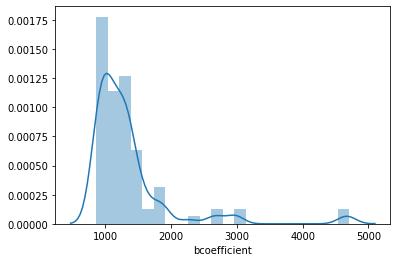

In [41]:
sns.distplot(df[df.bcoefficient > top5p].bcoefficient)

In [42]:
len(df[df.bcoefficient > top5p])

90

In [43]:
df[df.bcoefficient > top5p]\
    .sort_values(by=['bcoefficient'], ascending=False)\
    .reset_index(drop=True).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited
0,61956CJ0009,4709.500000,1958,12,3,2015,2013,55,2,0.250000,...,1958,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,1
1,61974CJ0002,4632.000000,1974,27,8,2011,2008,34,3,0.296296,...,1974,6,1974.0,1.0,0.446575,1,0,Judgment of the Court of 21 June 1974.,Jean Reyners v Belgian State.,1
2,61970CJ0022,2984.000000,1971,37,7,2002,2001,30,1,0.189189,...,1971,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,1
3,61960CJ0006,2965.000000,1960,7,2,2015,2014,54,1,0.285714,...,1960,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,0
4,61970CJ0030,2707.000000,1970,5,3,2013,2012,42,1,0.600000,...,1970,12,1970.0,6.0,0.501370,1,0,Judgment of the Court of 17 December 1970.,Otto Scheer v Einfuhr- und Vorratsstelle für ...,0
5,61962CJ0025,2631.000000,1963,39,4,2001,1999,36,2,0.102564,...,1963,7,1962.0,7.0,0.958904,1,0,Judgment of the Court of 15 July 1963.,Plaumann &amp; Co. v Commission of the Europe...,1
6,61970CJ0077,2267.000000,1971,7,6,1999,1998,27,1,0.857143,...,1971,6,1970.0,11.0,0.572603,1,0,Judgment of the Court (First Chamber) of 16 Ju...,Maurice Prelle v Commission of the European C...,0
7,61957CJ0008,1890.000000,1958,4,2,2002,2001,43,1,0.500000,...,1958,6,1957.0,3.0,1.284932,1,0,Judgment of the Court of 21 June 1958.,Groupement des hauts fourneaux et aciéries be...,0
8,61965CJ0044,1889.000000,1965,7,2,2009,2008,43,1,0.285714,...,1965,12,1965.0,6.0,0.523288,1,0,Judgment of the Court of 9 December 1965.,Hessische Knappschaft v Maison Singer et fils.,0
9,61977CJ0030,1843.666667,1977,34,5,2006,2005,28,1,0.147059,...,1977,10,1977.0,3.0,0.654795,1,0,Judgment of the Court of 27 October 1977.,Régina v Pierre Bouchereau.,1


Top sleeping beauty in case law, 61956CJ0009 is also the lazy case analysed on sleeping time years.  
The second sleeping beauty is a case that slept 34 years related to Right of establishment. https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594628405132&uri=CELEX:61974CJ0002

    Judgment of the Court of 21 June 1974. 
    Jean Reyners v Belgian State. 
    Reference for a preliminary ruling: Conseil d'Etat - Belgium. 
    Right of establishment. 
    Case 2-74.

The top **Non-popular sleeping beauty** is https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594628296212&uri=CELEX:61960CJ0006

    Judgment of the Court of 16 December 1960. 
    Jean-E. Humblet v Belgian State. 
    Case 6/60.

### 12.Are the oldest cases getting more chances to be sleeping beauties?

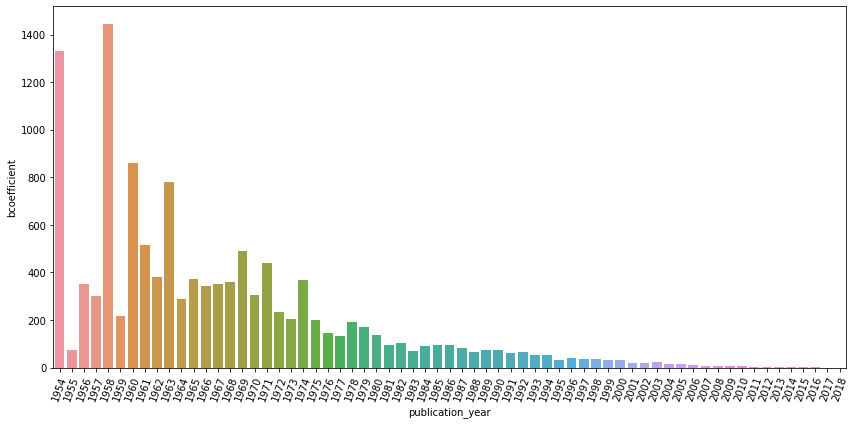

In [44]:
bcoeff_agg = df.groupby('publication_year').mean()['bcoefficient'].reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x="publication_year", y="bcoefficient", data=bcoeff_agg) #, orient="h"
plt.xticks(rotation=70)
plt.tight_layout()

Yes, the sleeping coefficient is a dependent of sleeping years and logically the older the cases the more chances get to sleep  
This means that is only fair to compare beauty coefficient with cases of their own cohort

### 13.Are the top cited cases getting more chances to be sleeping beauties?

In [45]:
print(df_non_top_sample.bcoefficient.mean(), df_top_cited.bcoefficient.mean())
stats.ttest_ind(df_non_top_sample.bcoefficient, df_top_cited.bcoefficient, equal_var = False)

5.333333333333333 376.88888888888886


Ttest_indResult(statistic=-1.0044149116831318, pvalue=0.42094302287451535)

Yes, they naturally are since beauty coefficient is dependent on number of citations

### 14.Are sleeping beauties more prevalent in certain subjects of law?

Taking the subjects top 20 

In [46]:
data_subjects = pd.read_csv('../datasets/subjects.csv')
df_subjects = df\
    .merge(data_subjects, how='inner', left_on='case_id', right_on='source')

In [47]:
df_subjects.head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited,source_y,subject
0,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Competition
1,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Agreements; decisions and concerted practices
2,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Free movement of goods
3,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Dominant position
4,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Measures having equivalent effect
5,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Quantitative restrictions
6,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Freedom to provide services
7,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Competition
8,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Agreements; decisions and concerted practices
9,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,0,61997CJ0147,Free movement of goods


In [48]:
subjects = df_subjects.groupby('subject')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases_count'})\
#    .head(20) #all these subjects are above 2% of the total of cases

In [49]:
l1, l2, l3 = [], [], []
for s in list(subjects.subject):
    l1.append(df_subjects[df_subjects.subject == s].bcoefficient.mean())
    l2.append(df_subjects[df_subjects.subject == s].bcoefficient.std())
    l3.append(df_subjects[(df_subjects.subject == s) & (df.bcoefficient > top5p)].count()['bcoefficient'])

subjects['bcoefficient_mean'] = l1
subjects['bcoefficient_std'] = l2
subjects['beauty_count'] = l3
subjects['beauty_percentage'] = subjects['beauty_count']/subjects['cases_count']*100

In [50]:
subjects[subjects['beauty_count'] > 0 ].sort_values('beauty_count', ascending = False)

,subject,cases_count,bcoefficient_mean,bcoefficient_std,beauty_count,beauty_percentage
0,Approximation of laws,3145,21.779715,88.959545,8,0.254372
1,Right of establishment,2309,26.163766,157.225767,7,0.303162
2,Freedom to provide services,2209,24.526249,109.843671,6,0.271616
4,Free movement of goods,2059,68.605747,189.488492,6,0.291404
5,Competition,1556,65.071161,186.464135,5,0.321337
22,Provisions governing the Institutions,505,49.312211,291.146822,4,0.792079
31,Non-discrimination on grounds of nationality,303,8.229923,21.003174,3,0.990099
10,Free movement of workers,997,45.886271,180.446948,3,0.300903
13,Environment,879,15.242722,40.390606,3,0.341297
14,Agreements; decisions and concerted practices,751,62.865414,175.300542,3,0.399467


**Yes**  
Customs Union the highest beauty score  
Agriculture and Fisheries the highest number of beauties  
Approximation of laws has the highest number of cases but only 2% of sleeping beauties

### 15.What is the sleeping beauty distribution on legislation reference?

In [51]:
laws = pd.read_csv('../datasets/top_refrenced_laws.csv')
df_laws = df\
    .merge(laws[['case_id','law_id','law_type']], how='inner', on='case_id')

In [52]:
df_laws.head(3)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,top_cited,law_id,law_type
0,61995CJ0067,55.0,1997,2,1,2008,2007,10,1,0.500000,...,1995.0,3.0,2.578082,1,0,Judgment of the Court (Second Chamber) of 9 Oc...,Rank Xerox Manufacturing (Nederland) BV v Ins...,0,31987R2658,R
1,61998CJ0285,211.0,2000,11,6,2009,2007,7,2,0.545455,...,1998.0,7.0,1.468493,1,0,Judgment of the Court of 11 January 2000.,Tanja Kreil v Bundesrepublik Deutschland.,1,31976L0207,L
2,61995CJ0001,268.0,1997,6,2,2014,2013,16,1,0.333333,...,1995.0,1.0,2.742466,1,0,Judgment of the Court (Sixth Chamber) of 2 Oct...,Hellen Gerster v Freistaat Bayern.,0,31976L0207,L


In [53]:
laws = df_laws.groupby('law_id')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases_count'})\
#    .head(20) #all these subjects are above 2% of the total of cases

In [54]:
l1, l2, l3 = [], [], []
for s in list(laws.law_id):
    l1.append(df_laws[df_laws.law_id == s].bcoefficient.mean())
    l2.append(df_laws[df_laws.law_id == s].bcoefficient.std())
    l3.append(df_laws[(df_laws.law_id == s) & (df.bcoefficient > top5p)].count()['bcoefficient'])

laws['bcoefficient_mean'] = l1
laws['bcoefficient_std'] = l2
laws['beauty_count'] = l3
laws['beauty_percentage'] = laws['beauty_count']/laws['cases_count']*100

/Users/pedrohserrano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [55]:
laws[laws['beauty_count'] > 0].sort_values('beauty_count', ascending = False)

,law_id,cases_count,bcoefficient_mean,bcoefficient_std,beauty_count,beauty_percentage
3,31994R0040,137,17.873966,47.660774,3,2.189781
7,32009R0207,115,1.360870,5.657842,3,2.608696
0,31977L0388,384,39.534679,117.064315,2,0.520833
13,31989L0104,83,10.444578,17.362001,2,2.409639
22,31979L0007,60,26.375000,39.263747,2,3.333333
1,31971R1408,269,40.655700,116.345234,1,0.371747
5,31987R2658,120,21.402778,53.549481,1,0.833333
6,31968R0950,119,98.750700,193.728873,1,0.840336
8,31968R1612,110,102.715663,241.295844,1,0.909091
9,31999R0659,101,10.330033,27.422365,1,0.990099


### 16. How does the sleeping beauties correlate with the centrality measures

In [93]:
citations = pd.read_csv('../datasets/all_cases_citations.csv')

In [87]:
# unique_celex = []
# unique_celex.extend(list(citations.source.unique()))
# unique_celex.extend(list(citations.target.unique()))

In [94]:
unique_cases = list(df.case_id.unique())
citations['source_in'] = citations.source.isin(unique_cases)
citations['target_in'] = citations.target.isin(unique_cases)
citations_valid = citations[(citations.source_in==True) & (citations.target_in==True)]

In [100]:
lines = [i+' '+j for i, j in zip(citations_valid.source, citations_valid.target)]

In [101]:
import networkx as nx

In [102]:
g = nx.parse_edgelist(lines, create_using=nx.DiGraph())

In [103]:
nodes, edges = g.order(), g.size()
avg_deg = float(nodes)/edges

In [104]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 8793
Edges: 34603
Avg Degree: 0.2541109152385631


In [105]:
def centrality_table(centrality_output):
    table = pd.DataFrame([i for i in centrality_output.items()]).sort_values(by=1, ascending=False)
    table.columns = ['Node','Centrality']
    return table

**Degree centrality**  
For particular node is the fraction of nodes it is connected to. We might assume that the node with highest value it's the more connected judgement across the network

In [106]:
degree = nx.degree_centrality(g)
df_degree = centrality_table(degree)
df_degree.head(10)

,Node,Centrality
2256,61993CJ0415,0.013876
3528,61998CJ0379,0.010350
453,61974CJ0008,0.009440
4928,62004CJ0446,0.008303
4426,62002CJ0189,0.008303
3503,61998CJ0352,0.007734
3883,62001CJ0491,0.007279
5395,62006CJ0120,0.007052
4838,62004CJ0094,0.006824
6812,62010CJ0416,0.006483


In [145]:
df_centrality_with_bcoeff = df_degree.merge(df[['case_id','bcoefficient']], how='left', left_on='Node', right_on='case_id')

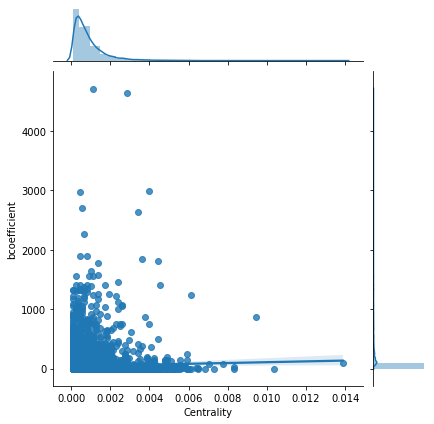

In [146]:
sns.jointplot("Centrality", "bcoefficient", data=df_centrality_with_bcoeff, kind="reg")

In [144]:
x, y = df_degree_with_bcoeff.Centrality.values, df_degree_with_bcoeff.bcoefficient.values

In [139]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import linregress

In [140]:
corr1, p_value1 = spearmanr(x, y)
corr2, p_value2 = pearsonr(x, y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

In [141]:
print(corr1, p_value1, corr2, p_value2)

-0.046060173308166 1.5547335288866233e-05 0.03359476392403618 0.0016290427066278292


In [142]:
print(slope, intercept, rvalue, pvalue, stderr)

6823.53541706646 39.08973312867419 0.033594763924036194 0.00162904270662437 2165.0777849703486


**Closeness centrality**   

Notice that higher values of closeness indicate higher centrality. Literaly we might say that is a "heavy" node, which influences others and it's very in the center of the network

In [147]:
closeness = nx.closeness_centrality(g)
df_closeness = centrality_table(closeness)
df_closeness.head(10)

,Node,Centrality
949,61984CJ0152,0.128084
453,61974CJ0008,0.125531
516,61981CJ0008,0.118772
619,61981CJ0322,0.118088
454,61978CJ0120,0.117125
994,61984CJ0222,0.115166
284,61977CJ0013,0.114569
169,61976CJ0085,0.114233
344,61976CJ0033,0.113984
165,61976CJ0078,0.113889


In [148]:
df_centrality_with_bcoeff = df_closeness.merge(df[['case_id','bcoefficient']], how='left', left_on='Node', right_on='case_id')

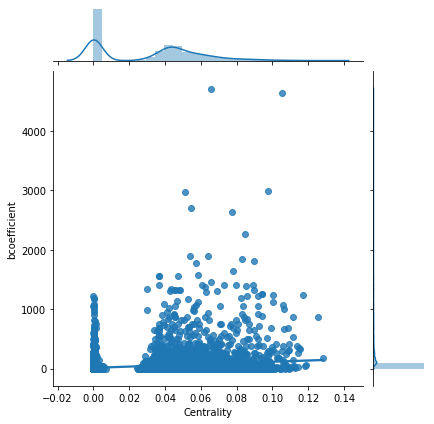

In [149]:
sns.jointplot("Centrality", "bcoefficient", data=df_centrality_with_bcoeff, kind="reg")

**Communicability**   
How good the nodes can reach others

In [16]:
#not for diricted graph
#communicability = nx.communicability(g)
#df_communicability = centrality_summary(communicability)
#df_communicability.head(10)

**Betweenness centrality**   
The highest betweenness the highest control over the network, because more information will pass through that node

In [150]:
betweenness = nx.betweenness_centrality(g)

In [151]:
df_betweenness = centrality_table(betweenness)
df_betweenness.head(10)

,Node,Centrality
2378,61993CJ0046,0.147050
2379,62015CJ0628,0.145122
1891,62010CJ0282,0.117182
1890,61990CJ0006,0.116537
5797,62007CJ0378,0.090146
2427,61993CJ0312,0.076334
5186,62005CJ0238,0.075857
116,61975CJ0043,0.074358
4931,62004CJ0295,0.074040
2936,61998CO0017,0.071337


In [152]:
df_centrality_with_bcoeff = df_betweenness.merge(df[['case_id','bcoefficient']], how='left', left_on='Node', right_on='case_id')

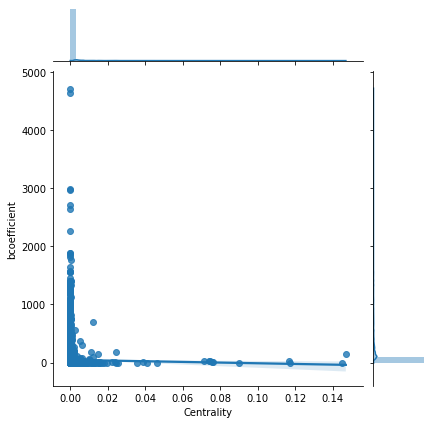

In [153]:
sns.jointplot("Centrality", "bcoefficient", data=df_centrality_with_bcoeff, kind="reg")

In [154]:
tradeoff = 0.002

In [155]:
len(betweenness.keys())

8793

In [156]:
top_80 = [i for i in betweenness.keys()][0:80]

In [157]:
betweenness_top = {k:betweenness[k] for k in top_80 if k in betweenness} #the variable has the same name but it's just the top

In [158]:
highbetw = {key if value > tradeoff else None for key, value in betweenness_top.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness_top.items()}

In [159]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "skyblue"] #more.. "skyblue", "mistyrose", "aliceblue"]

In [160]:
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

In [161]:
#subgraph of 100 nodes with higher betweenes
#{k:g[k] for k in top_80 if k in g}

In [162]:
#for i in g:
#    print (i)

In [163]:
node_colors = [find_color(node) for node in g.nodes()]

In [164]:
#plt.figure(figsize=(16, 8))
#nx.draw(g, node_color=node_colors, width=0.8)

In [ ]:
plt.figure(figsize=(16, 8))
nx.draw(g, node_color=node_colors, width=0.8)

In [43]:
pagerank = nx.pagerank(g, alpha=0.9)

In [28]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

#### Degree Frequency

In [29]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0,0.5,'Number of nodes')

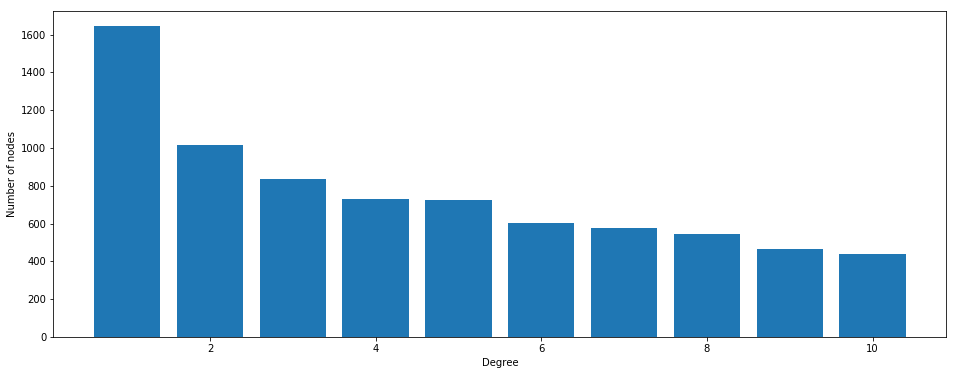

In [30]:
plt.figure(figsize=(16, 6))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [51]:
#nx.diameter(g)

The **radius** is the minimum eccentricity.

In [53]:
#nx.radius(g)

The **center** is the set of nodes with eccentricity equal to radius.

In [ ]:
#nx.center(g)

The **dijkstra** method to find the shortest path between two nodes 

In [ ]:
#dijkstra = nx.dijkstra_path(g,#'node','node')